In [15]:
# Load Data Packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

In [16]:
# Text Cleaning
import neattext.functions as nfx

In [17]:
!pip install pandas

In [21]:
# Loading Dataset
df = pd.read_csv("data/emotion_dataset_raw.csv")

In [23]:
df.head()

Emotion                                               Text
0  neutral                                             Why ? 
1      joy    Sage Act upgrade on my to do list for tommorow.
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3      joy   Such an eye ! The true hazel eye-and so brill...
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...

In [25]:
# Shape
df.shape

(34792, 2)

In [27]:
# Datatypes
df.dtypes

Emotion    object
Text       object
dtype: object

In [29]:
# Checking For Missing Values
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [31]:
# Value Counts Of Emotions
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion'>

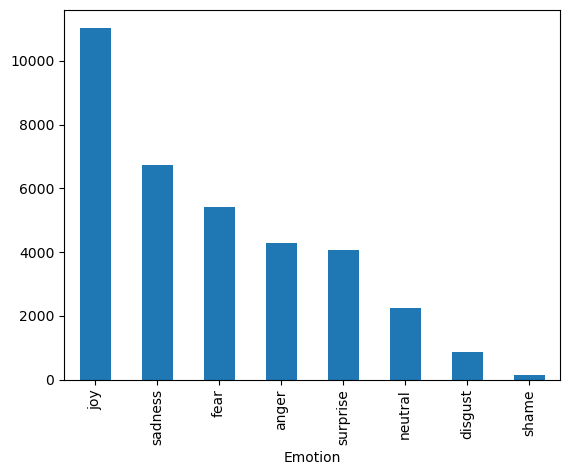

In [33]:
# Value Counts of Emotions
df['Emotion'].value_counts().plot(kind='bar')

<Axes: xlabel='count', ylabel='Emotion'>

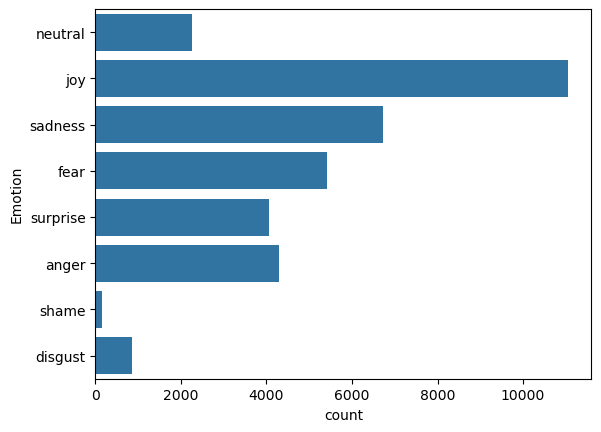

In [35]:
# Using Seaborn to Plot
sns.countplot(df['Emotion'])

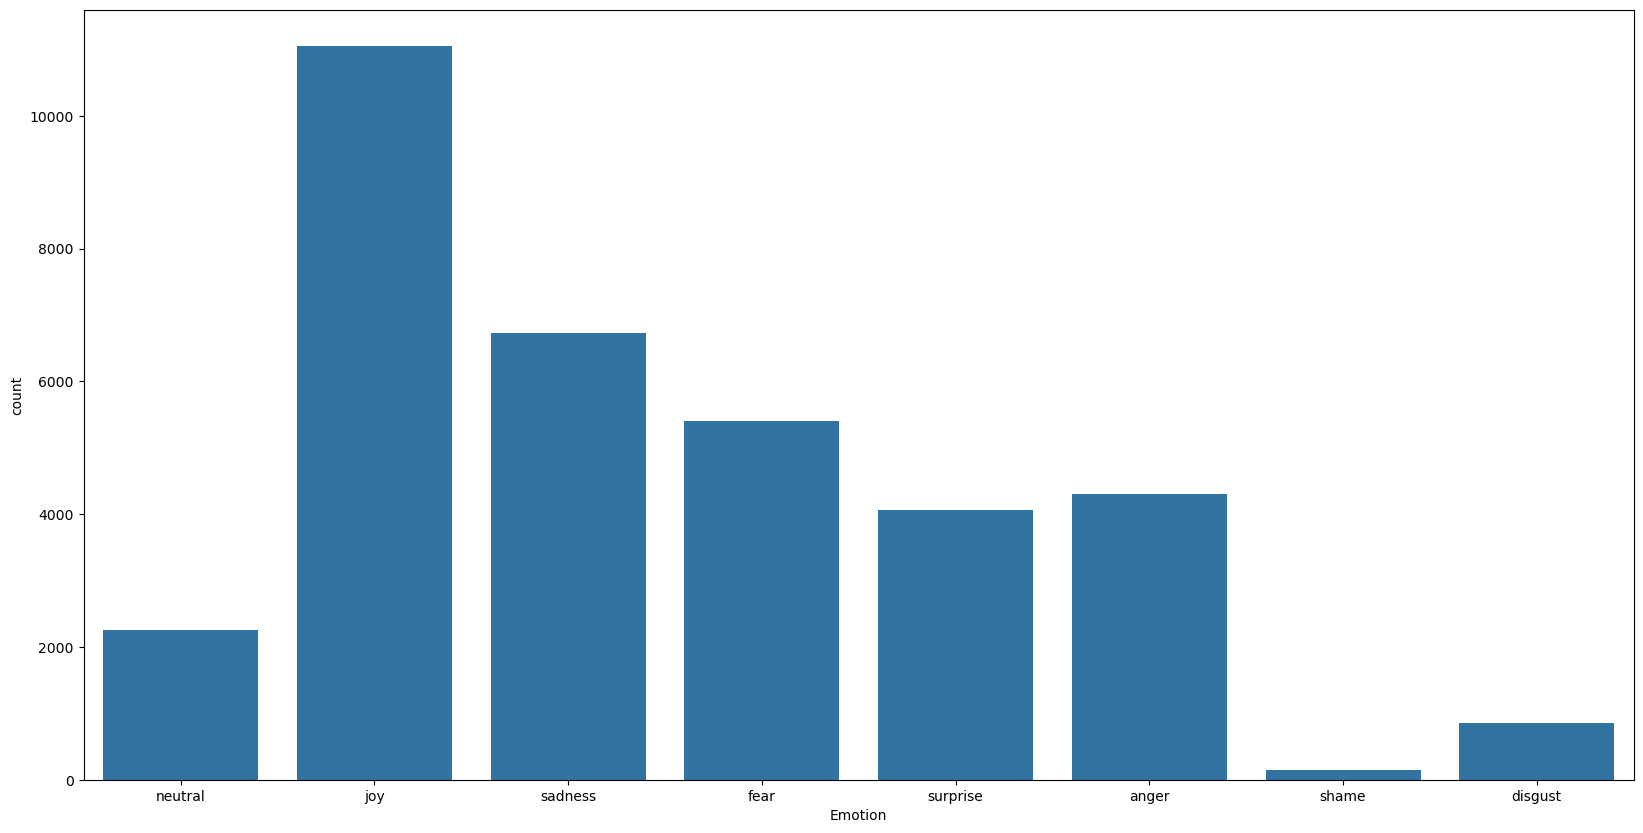

In [37]:
# Using Seaborn other Method (New)
plt.figure(figsize=(20,10))
sns.countplot(x='Emotion',data=df)
plt.show()

In [39]:
# Sentiment Analysis
from textblob import TextBlob

In [40]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = "Positive"
    elif sentiment < 0:
        result = "Negative"
    else:
        result = "Neutral"
    return result

In [43]:
# Testing The Function
get_sentiment("I love Zhengzhou University")

'Positive'

In [45]:
# Testing The Function
get_sentiment("I hate hiking")

'Negative'

In [47]:
# Testing The Function
get_sentiment("The meeting is scheduled to start at 10:00 AM tomorrow")

'Neutral'

In [49]:
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [50]:
df.head()

Emotion                                               Text Sentiment
0  neutral                                             Why ?    Neutral
1      joy    Sage Act upgrade on my to do list for tommorow.   Neutral
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...  Negative
3      joy   Such an eye ! The true hazel eye-and so brill...  Positive
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   Neutral

In [51]:
# Comparing Our Emotions with Sentiment
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1535
          Neutral      1843
          Positive     2032
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1546
          Positive     1893
dtype: int64

<Axes: xlabel='Emotion,Sentiment'>

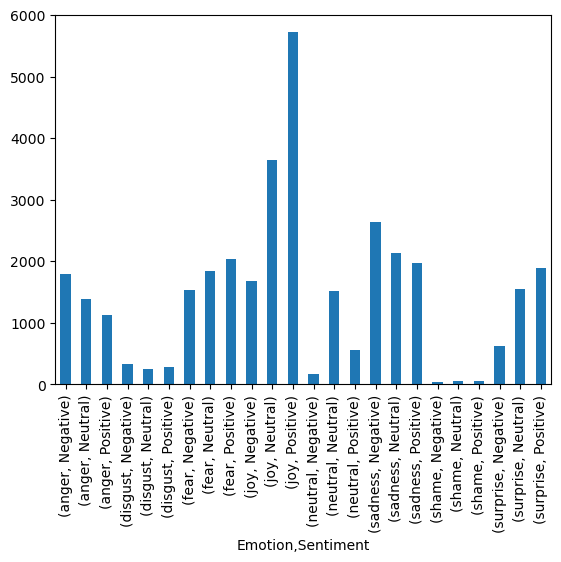

In [52]:
# Using Matplotlib to Compare Emotions Vs Sentiment
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

In [53]:
# Using Seaborn to Compare Emotions Vs Sentiment
sns.catplot

<function seaborn.categorical.catplot(data=None, *, x=None, y=None, hue=None, row=None, col=None, kind='strip', estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, units=None, weights=None, order=None, hue_order=None, row_order=None, col_order=None, col_wrap=None, height=5, aspect=1, log_scale=None, native_scale=False, formatter=None, orient=None, color=None, palette=None, hue_norm=None, legend='auto', legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, ci=<deprecated>, **kwargs)>

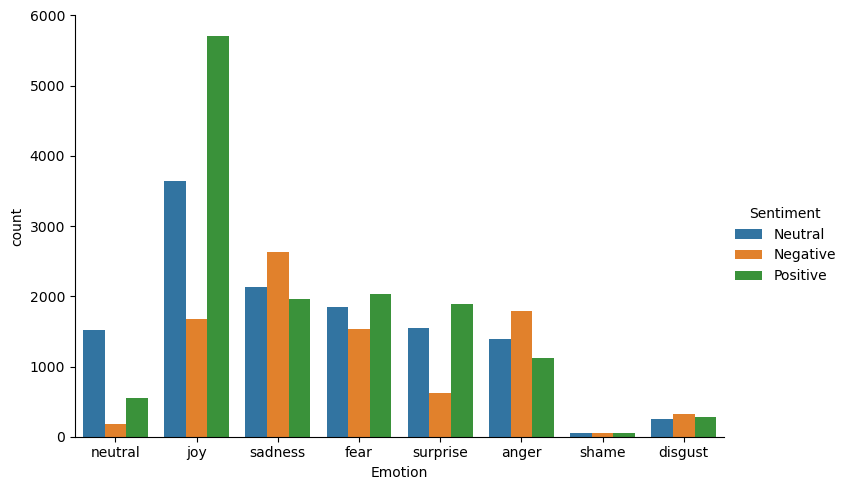

In [59]:
sns.catplot(x='Emotion' ,hue='Sentiment' ,data=df, kind='count', aspect=1.5)

In [61]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [63]:
df['Text']

0                                                   Why ? 
1          Sage Act upgrade on my to do list for tommorow.
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3         Such an eye ! The true hazel eye-and so brill...
4        @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
                               ...                        
34787    @MichelGW have you gift! Hope you like it! It'...
34788    The world didnt give it to me..so the world MO...
34789                             A man robbed me today . 
34790    Youu call it JEALOUSY, I call it of #Losing YO...
34791    I think about you baby, and I dream about you ...
Name: Text, Length: 34792, dtype: object

In [65]:
# Text Cleaning: Removing StopWords, User Handles and Punctuations

In [67]:
df['Clean_Text'] =  df['Text'].apply(nfx.remove_stopwords)

In [69]:
df['Clean_Text'] =  df['Clean_Text'].apply(nfx.remove_userhandles)

In [71]:
df['Clean_Text'] =  df['Clean_Text'].apply(nfx.remove_punctuations)

In [73]:
df[['Text','Clean_Text']]

Text  \
0                                                 Why ?    
1        Sage Act upgrade on my to do list for tommorow.   
2      ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3       Such an eye ! The true hazel eye-and so brill...   
4      @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   
...                                                  ...   
34787  @MichelGW have you gift! Hope you like it! It'...   
34788  The world didnt give it to me..so the world MO...   
34789                           A man robbed me today .    
34790  Youu call it JEALOUSY, I call it of #Losing YO...   
34791  I think about you baby, and I dream about you ...   

                                              Clean_Text  
0                                                         
1                         Sage Act upgrade list tommorow  
2      WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...  
3      eye  true hazel eyeand brilliant  Regular feat...  
4        ugh babe hugggzzz u  babe naamazed nga ako e...  
...                                                  ...  
34787         gift Hope like it hand wear  Itll warm Lol  
34788         world didnt meso world DEFINITELY cnt away  
34789                                  man robbed today   
34790                          Youu JEALOUSY #Losing YOU  
34791                              think baby dream time  

[34792 rows x 2 columns]

In [75]:
from collections import Counter

In [77]:
def extract_keywords(text,num=50):
    tokens = [ tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [79]:
# list Of Emotions
emotion_list = df['Emotion'].unique().tolist()

In [81]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [83]:
df[df['Emotion'] == 'joy']

Emotion                                               Text Sentiment  \
1         joy    Sage Act upgrade on my to do list for tommorow.   Neutral   
3         joy   Such an eye ! The true hazel eye-and so brill...  Positive   
4         joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   Neutral   
12        joy  For once in his life , Leopold must have been ...  Positive   
17        joy    I have a feeling i will fail french #fuckfrench  Negative   
...       ...                                                ...       ...   
34778     joy                 In other news, my mum made EFO.     Negative   
34784     joy  ~ As musicas que nois danço com os munitores t...  Positive   
34785     joy  When I understood that I was admitted to the U...   Neutral   
34786     joy    Tuesday woken up to Oscar and Cornet practice X   Neutral   
34788     joy  The world didnt give it to me..so the world MO...  Positive   

                                              Clean_Text  
1                         Sage Act upgrade list tommorow  
3      eye  true hazel eyeand brilliant  Regular feat...  
4        ugh babe hugggzzz u  babe naamazed nga ako e...  
12     life  Leopold truly happy : hopes prayers belo...  
17                       feeling fail french #fuckfrench  
...                                                  ...  
34778                                       news mum EFO  
34784  ~ musicas que nois danço com os munitores todo...  
34785                     understood admitted University  
34786              Tuesday woken Oscar Cornet practice X  
34788         world didnt meso world DEFINITELY cnt away  

[11045 rows x 4 columns]

In [85]:
df[df['Emotion'] == 'joy']['Clean_Text']

1                           Sage Act upgrade list tommorow
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
12       life  Leopold truly happy : hopes prayers belo...
17                         feeling fail french #fuckfrench
                               ...                        
34778                                         news mum EFO
34784    ~ musicas que nois danço com os munitores todo...
34785                       understood admitted University
34786                Tuesday woken Oscar Cornet practice X
34788           world didnt meso world DEFINITELY cnt away
Name: Clean_Text, Length: 11045, dtype: object

In [87]:
df[df['Emotion'] == 'joy']['Clean_Text']

1                           Sage Act upgrade list tommorow
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
12       life  Leopold truly happy : hopes prayers belo...
17                         feeling fail french #fuckfrench
                               ...                        
34778                                         news mum EFO
34784    ~ musicas que nois danço com os munitores todo...
34785                       understood admitted University
34786                Tuesday woken Oscar Cornet practice X
34788           world didnt meso world DEFINITELY cnt away
Name: Clean_Text, Length: 11045, dtype: object

In [89]:
joy_list = df[df['Emotion'] == 'joy']['Clean_Text'].tolist()

In [91]:
# Joy Document
joy_docx = ''.join(joy_list)

In [95]:
joy_docx

'Sage Act upgrade list tommoroweye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness   ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko anglife  Leopold truly happy : hopes prayers beloved son come fruition feeling fail french #fuckfrenchGoodLet  fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhileterribly ecstatic dangerous thing selected study universityYeah  ’ ages  passed BA exams class resultsheard selected fot year university Zambia form Chikola secondary schoolWelp time study daysHeading campus rain grad photosfeeling awesome   brings  Ive bought Christmas presents trawl loads shops :)shit pants Pure 100% gravylife  Leopold truly happy : hopes prayers beloved son come fruition Class jamming paper quarter rea

In [97]:
# Extract Keywords in joy Emotion
keyword_joy = extract_keywords(joy_docx)

In [99]:
keyword_joy

{'amp': 652,
 'day': 582,
 'time': 468,
 'Im': 453,
 'like': 439,
 'work': 400,
 'Christmas': 370,
 'today': 318,
 'good': 312,
 'tomorrow': 304,
 'happy': 303,
 'love': 283,
 'going': 283,
 'night': 250,
 'got': 248,
 'home': 248,
 'school': 233,
 '2': 232,
 'morning': 225,
 'joy': 214,
 'life': 208,
 'hours': 201,
 'feel': 193,
 'year': 183,
 'people': 179,
 'long': 178,
 's': 176,
 'new': 172,
 'great': 168,
 'days': 166,
 'week': 163,
 'sleep': 158,
 'know': 158,
 'family': 157,
 'RT': 156,
 'hour': 152,
 'God': 143,
 ':)': 143,
 'cant': 137,
 'excited': 135,
 'tonight': 134,
 'friends': 128,
 'feeling': 126,
 'felt': 126,
 'friend': 126,
 'right': 124,
 '3': 123,
 'old': 121,
 'me': 121,
 'think': 119}

In [101]:
# Plotting the Keywords Extracted from Joy emotion Using Seaborn
def plot_most_common_words(mydict,emotion_name):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    plt.title("Plot of {} Most Common Keywords".format(emotion_name))
    sns.barplot(x='token', y='count', data=df_01)
    plt.xticks(rotation=45)
    plt.show()

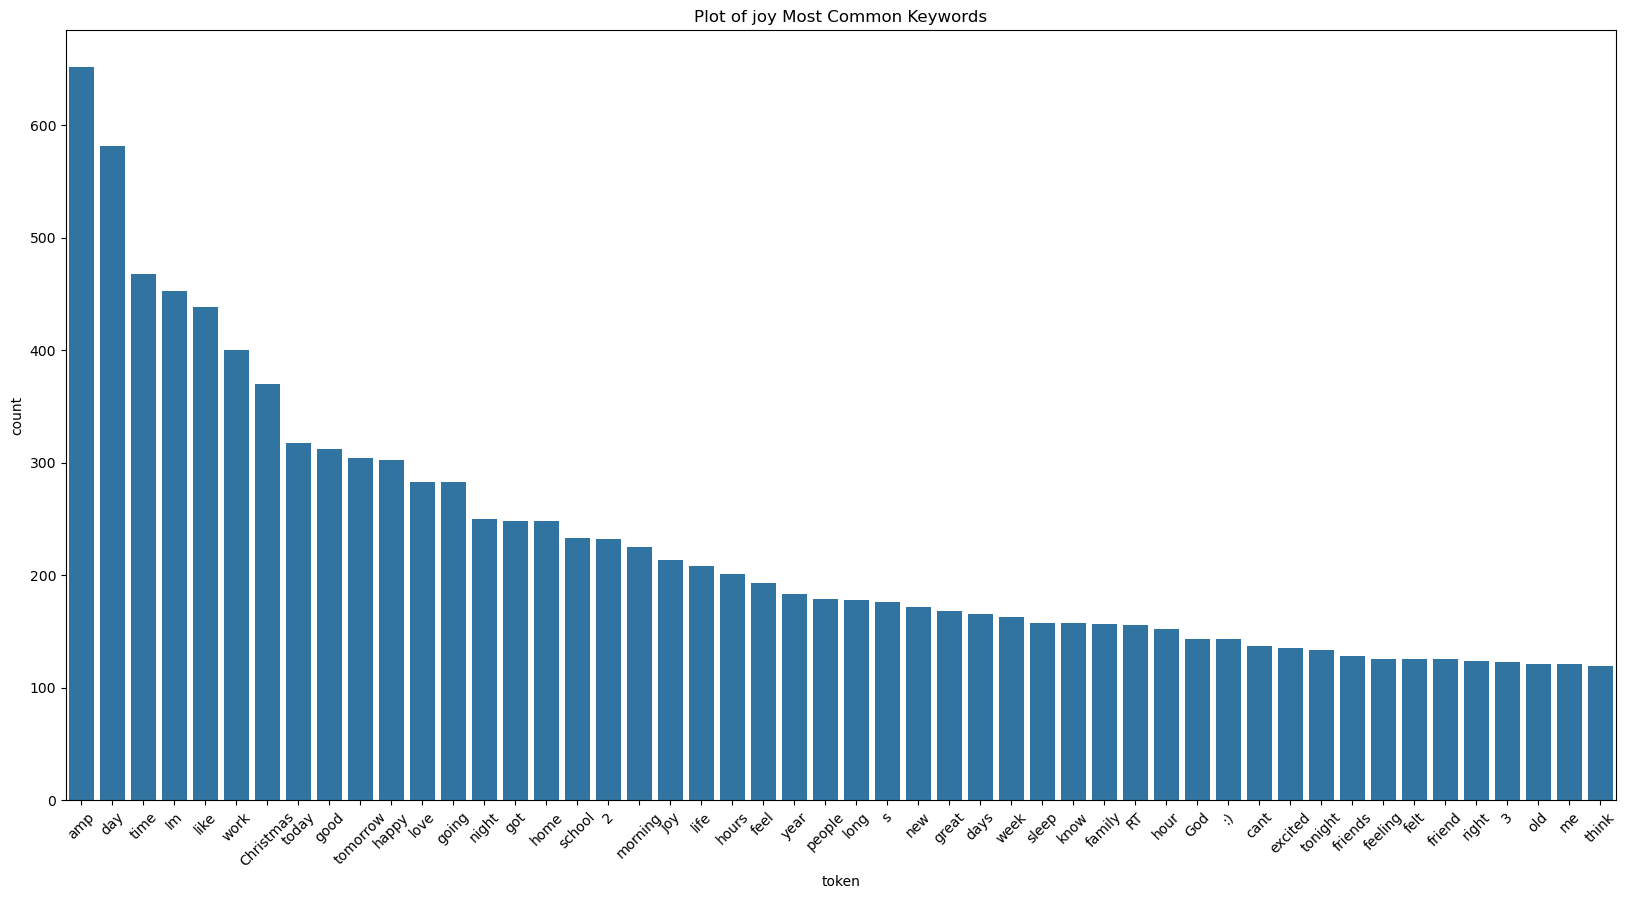

In [103]:
plot_most_common_words(keyword_joy,"joy")

In [105]:
# Suprise Emotion
surprise_list = df[df['Emotion'] == 'surprise']['Clean_Text'].tolist()
# Document
surprise_docx = ''.join(surprise_list)
# Extract KeyWords
keyword_surprise = extract_keywords(surprise_docx)

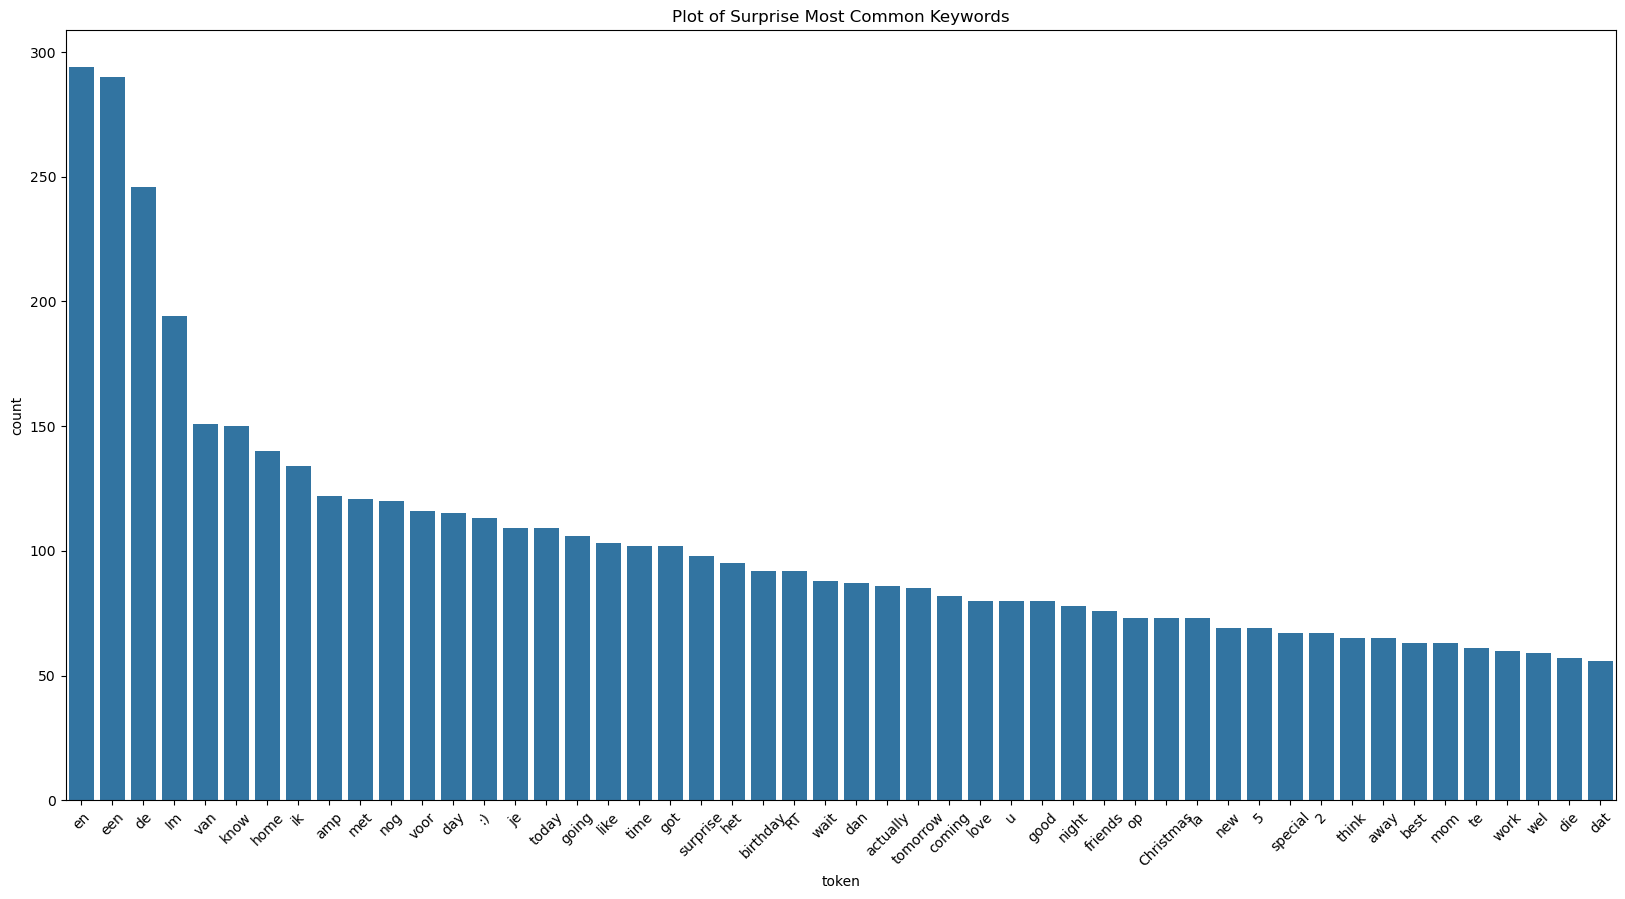

In [107]:
plot_most_common_words(keyword_surprise,"Surprise")

In [109]:
## Word Cloud
from wordcloud import WordCloud

In [111]:
def plot_wordcloud(docx):
    mywordcloud = WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

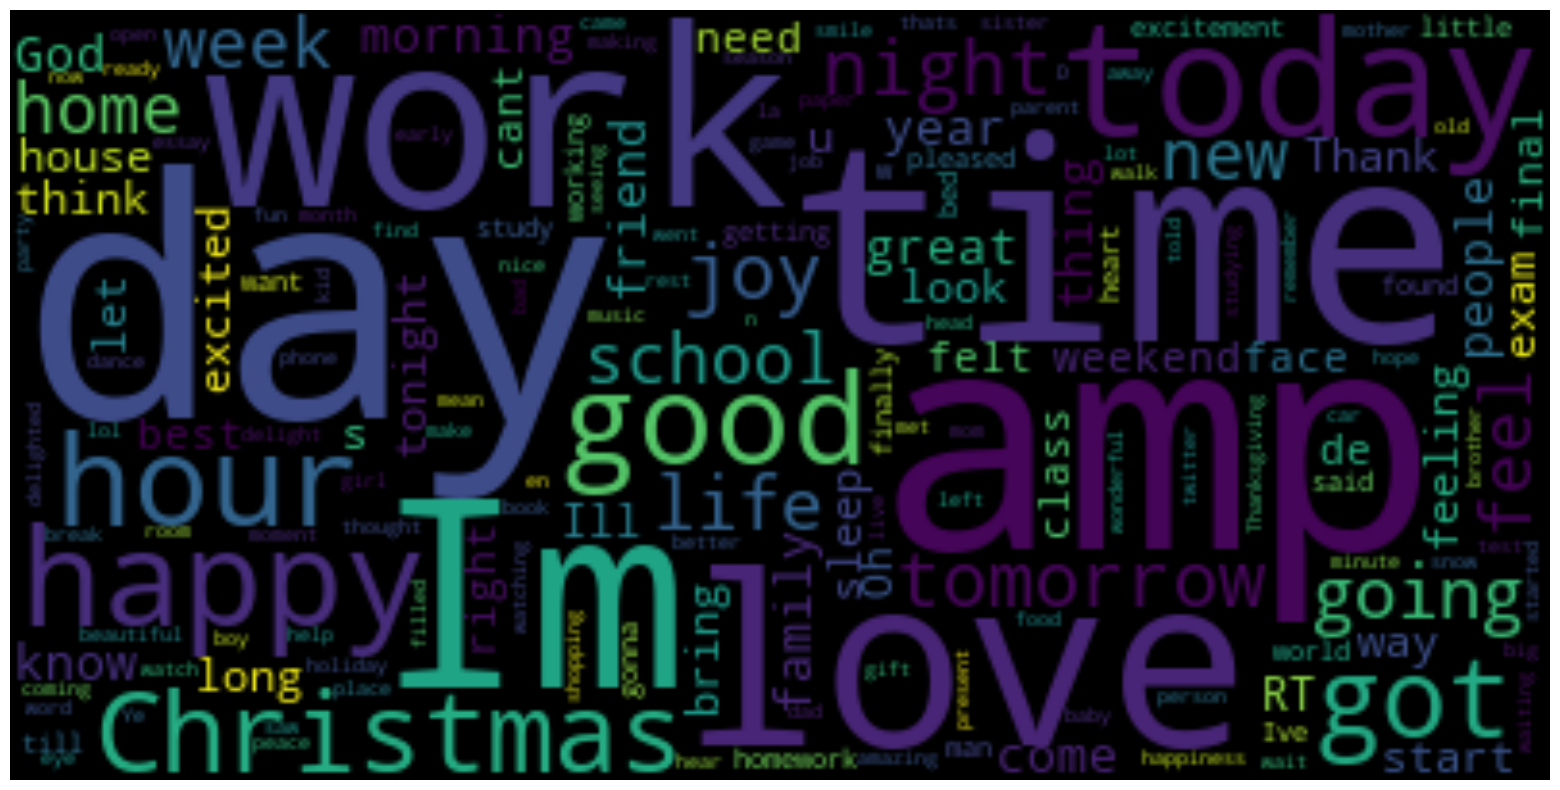

In [113]:
# Without Axis
plot_wordcloud(joy_docx)

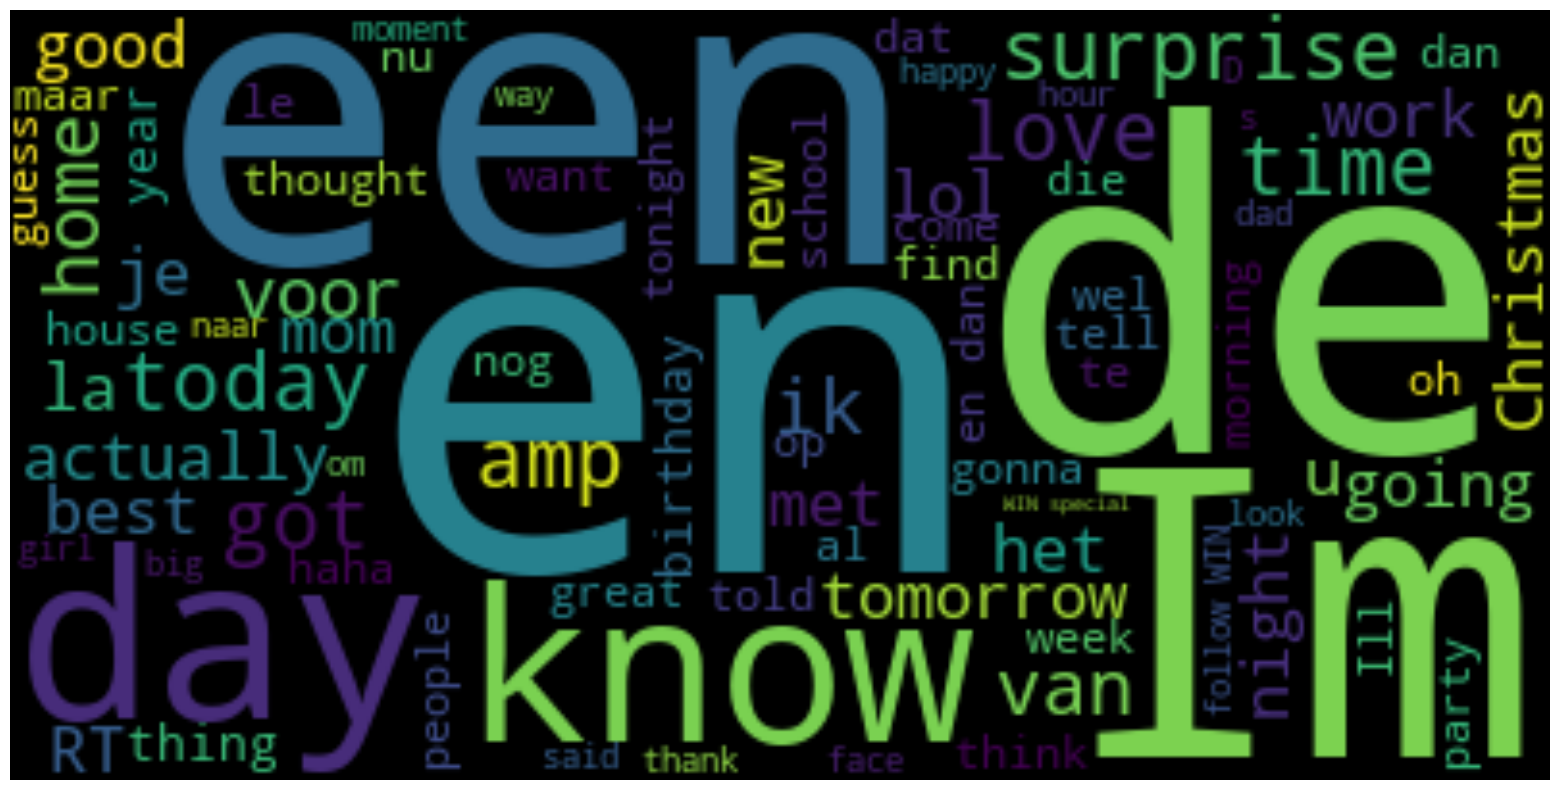

In [115]:
# Without Axis
plot_wordcloud(surprise_docx)

In [117]:
def plot_wordcloud(docx):
    mywordcloud = WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.show()

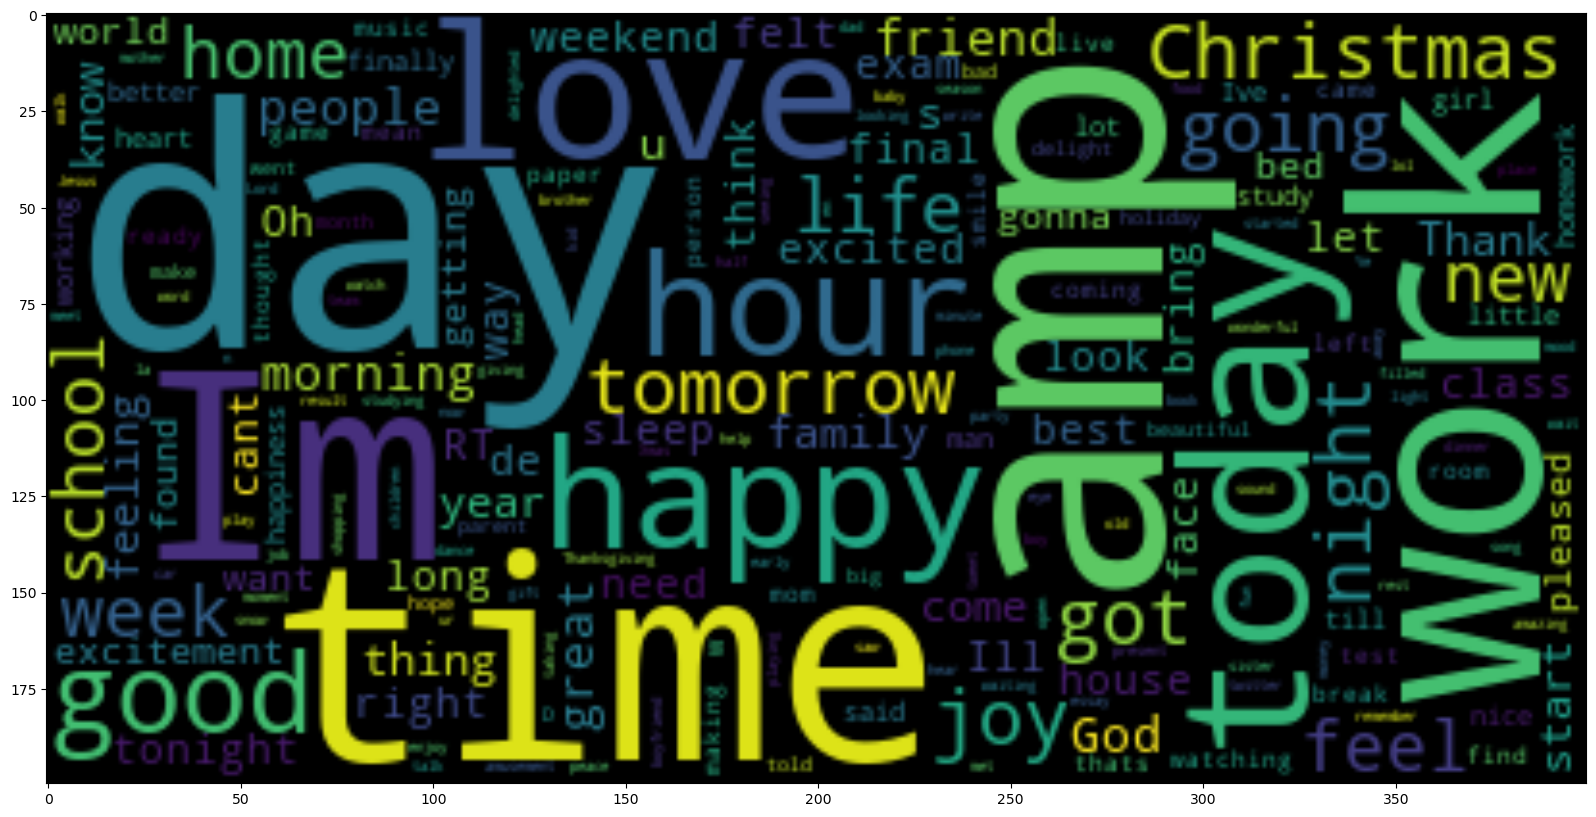

In [119]:
plot_wordcloud(joy_docx)

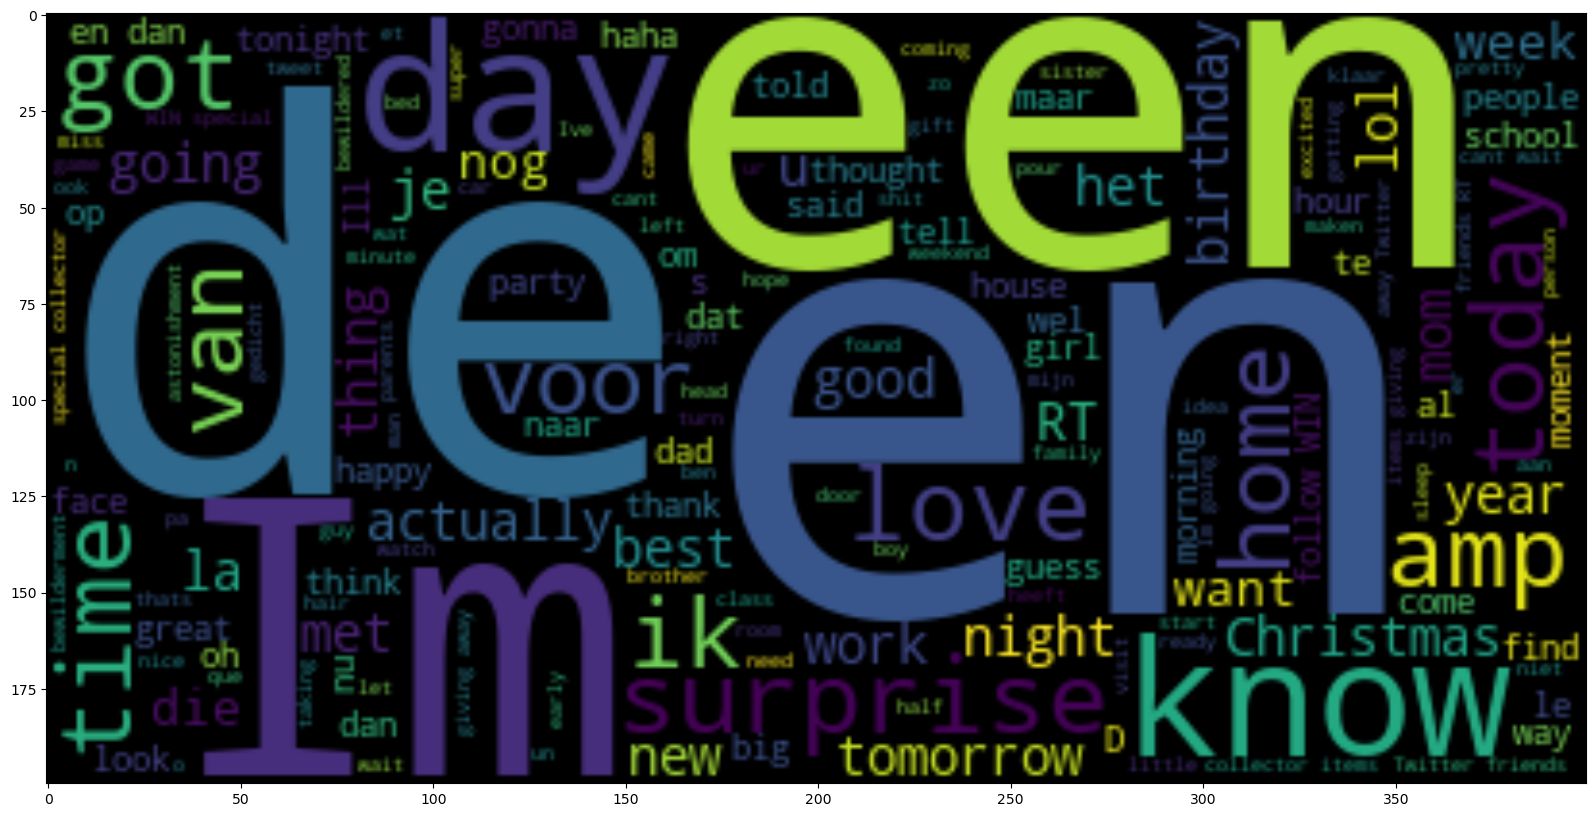

In [139]:
plot_wordcloud(surprise_docx)

In [123]:
# Load Machine Learning Packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


In [125]:
# Splitting out Dataset
from sklearn.model_selection import train_test_split

In [127]:
### Build Features from Our Text

In [129]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [131]:
Xfeatures

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: Clean_Text, Length: 34792, dtype: object

In [133]:
# Vectorizer
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)  # Fit and transform the text data

In [135]:
# Get Features by Name
feature_names = cv.get_feature_names_out()
print(feature_names)

['00' '000' '000ème' ... 'ღƪ' 'ℕoíʀ' 'ㄒʜℰℳℰ']


In [137]:
# To Dense Array (Numpy)
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [139]:
# Split Dataset 
X_train,X_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)

### Build Our Model

In [142]:
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [144]:
# Accuracy
# Method 1
nv_model.score(X_test,y_test)

0.5642843456600881

In [146]:
# Predictions
y_pred_for_nv = nv_model.predict(X_test)

In [148]:
y_pred_for_nv

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'anger', 'sadness'],
      dtype='<U8')

### Make A Single Prediction
+ Vectorized our Text
+ Applied our Model

In [151]:
sample_text = ["I love Zhengzhou University and python programming"]

In [153]:
vect = cv.transform(sample_text).toarray()

In [155]:
# Make Prediction
nv_model.predict(vect)

array(['joy'], dtype='<U8')

In [157]:
# Check For the Prediction Probability(Percentage)/Confidence Score
nv_model.predict_proba(vect)

array([[1.09253916e-02, 1.49054209e-04, 2.59890282e-01, 5.88117664e-01,
        1.22088891e-03, 1.36627092e-01, 3.74701929e-06, 3.06588048e-03]])

In [159]:
# get All class for our Model
nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [161]:
np.max(nv_model.predict_proba(vect))

0.5881176640866398

In [163]:
def predict_emotion(sample_text,model):
    myvect = cv.transform(sample_text).toarray()
    prediction = model.predict(myvect)
    pred_proba = model.predict_proba(myvect)
    pred_percentage_for_all = dict(zip(model.classes_,pred_proba[0]))
    print("Prediction:{}, Prediction Score:{}".format(prediction[0],np.max(pred_proba)))
    return pred_percentage_for_all

In [165]:
predict_emotion(sample_text,nv_model)

Prediction:joy, Prediction Score:0.5881176640866398


{'anger': 0.010925391570306009,
 'disgust': 0.00014905420899051302,
 'fear': 0.2598902815120901,
 'joy': 0.5881176640866398,
 'neutral': 0.0012208889050093492,
 'sadness': 0.1366270922211706,
 'shame': 3.747019292272374e-06,
 'surprise': 0.003065880476504387}

In [167]:
predict_emotion(["He hates hiking."],nv_model)

Prediction:sadness, Prediction Score:0.4865956455018789


{'anger': 0.05448040101075439,
 'disgust': 0.06923961119262247,
 'fear': 0.06181547821740795,
 'joy': 0.18880376074788013,
 'neutral': 0.035180448331219534,
 'sadness': 0.4865956455018789,
 'shame': 0.003067749012294428,
 'surprise': 0.10081690598594051}

In [169]:
predict_emotion(["He loves Singing."],nv_model)

Prediction:joy, Prediction Score:0.9007558445006394


{'anger': 0.023476485438741045,
 'disgust': 0.0031967643942795755,
 'fear': 0.0076106539354967246,
 'joy': 0.9007558445006394,
 'neutral': 0.002165689122414119,
 'sadness': 0.01925650369977359,
 'shame': 9.442447412369895e-05,
 'surprise': 0.04344363443453066}

In [171]:
predict_emotion(["He is scared of heights"],nv_model)

Prediction:fear, Prediction Score:0.9367511231389875


{'anger': 0.0010495648176376774,
 'disgust': 0.0005022708657644305,
 'fear': 0.9367511231389875,
 'joy': 0.045495673235421925,
 'neutral': 0.0004051718940685509,
 'sadness': 0.006279802237787649,
 'shame': 1.3678604066966714e-05,
 'surprise': 0.009502715206269014}

In [173]:
predict_emotion(["Hi !"],nv_model)

Prediction:neutral, Prediction Score:0.3845546473552215


{'anger': 0.031645607762709894,
 'disgust': 0.004450431548316071,
 'fear': 0.03478302345387778,
 'joy': 0.33393193166409413,
 'neutral': 0.3845546473552215,
 'sadness': 0.10494243372021322,
 'shame': 0.000962387554206656,
 'surprise': 0.10472953694136124}

In [175]:
predict_emotion(["I'm furious that you would do this without consulting me"],nv_model)

Prediction:anger, Prediction Score:0.9879635399009076


{'anger': 0.9879635399009076,
 'disgust': 4.8434434458341555e-06,
 'fear': 0.003146250779789713,
 'joy': 0.007191650229491848,
 'neutral': 4.2974945646591716e-09,
 'sadness': 0.0013887098562114667,
 'shame': 5.448123680711238e-10,
 'surprise': 0.0003050009478503115}

In [177]:
predict_emotion(["I'm so embarrassed and ashamed."],nv_model)

Prediction:shame, Prediction Score:0.37310680468054613


{'anger': 0.08364466650531098,
 'disgust': 0.005326159262053077,
 'fear': 0.17536650336991777,
 'joy': 0.14900546638372883,
 'neutral': 0.002784149524312355,
 'sadness': 0.2039611192231721,
 'shame': 0.37310680468054613,
 'surprise': 0.006805131050961284}

In [179]:
predict_emotion(["Wow, that's completely unexpected"],nv_model)

Prediction:surprise, Prediction Score:0.5441095807311704


{'anger': 0.017562696411662283,
 'disgust': 0.0005964387023842058,
 'fear': 0.019638047712319213,
 'joy': 0.24708208123550016,
 'neutral': 0.0004676656614519885,
 'sadness': 0.17053982706497395,
 'shame': 3.6624805364580096e-06,
 'surprise': 0.5441095807311704}

In [181]:
predict_emotion(["People likeme disgruntled."],nv_model)

Prediction:disgust, Prediction Score:0.4097988826476902


{'anger': 0.13126271546802834,
 'disgust': 0.4097988826476902,
 'fear': 0.11008118019614621,
 'joy': 0.1470724509474515,
 'neutral': 0.013799216851008485,
 'sadness': 0.13858127712360524,
 'shame': 0.0004652206885062004,
 'surprise': 0.04893905607756348}

### Model Evaluation

In [184]:
# Classification
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.64      0.49      0.56      1283
     disgust       0.53      0.03      0.06       292
        fear       0.75      0.60      0.67      1645
         joy       0.51      0.86      0.64      3311
     neutral       0.30      0.02      0.04       675
     sadness       0.56      0.54      0.55      2015
       shame       1.00      0.03      0.05        36
    surprise       0.61      0.27      0.38      1181

    accuracy                           0.56     10438
   macro avg       0.61      0.36      0.37     10438
weighted avg       0.57      0.56      0.53     10438



In [186]:
# Confusion
confusion_matrix(y_test,y_pred_for_nv)

array([[ 633,    0,   58,  373,    7,  199,    0,   13],
       [  31,   10,   25,  132,    2,   81,    0,   11],
       [  79,    2,  984,  353,    4,  160,    0,   63],
       [  76,    1,  100, 2848,    9,  204,    0,   73],
       [  20,    0,   17,  550,   14,   71,    0,    3],
       [  89,    1,   74,  726,    7, 1080,    0,   38],
       [   9,    0,    7,   13,    0,    5,    1,    1],
       [  49,    5,   47,  621,    4,  135,    0,  320]], dtype=int64)

In [188]:
# Generate Predictions
y_pred = nv_model.predict(X_test)

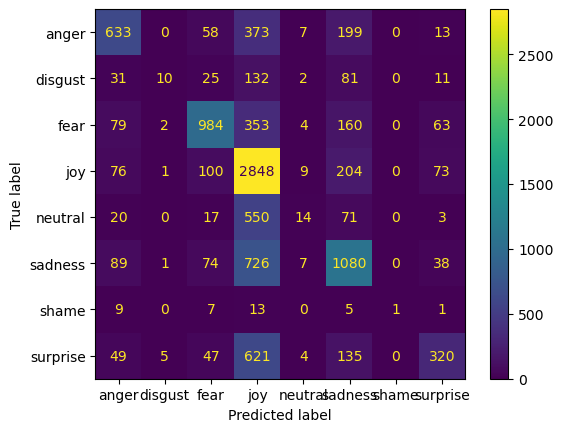

In [190]:
# Plot Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

### Save Model

In [193]:
import joblib

In [195]:
model_file = open("emotion_classifier_pipe_lr_25_December_2025","wb")
joblib.dump(nv_model,model_file)
model_file.close()

### Model Interpretation
+ Eli5
+ Lime
+ Shap

In [198]:
# LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [199]:
# Accuracy
lr_model.score(X_test,y_test)

0.622341444721211

In [200]:
# Single Predict
predict_emotion(sample_text,lr_model)

Prediction:joy, Prediction Score:0.6526833428300345


{'anger': 0.026319140938471063,
 'disgust': 0.0036209466469486313,
 'fear': 0.11187312098836885,
 'joy': 0.6526833428300345,
 'neutral': 0.027605116919155397,
 'sadness': 0.16375257196811083,
 'shame': 0.0007058626282341121,
 'surprise': 0.013439897080676616}

In [1]:
cd C:\Users\Administrator\Desktop\202180090142_FINAL_PYTHON_PROJECT\App

C:\Users\Administrator\Desktop\202180090142_FINAL_PYTHON_PROJECT\App


In [ ]:
!streamlit run app.py